# Problem 1: Quantum Teleportation (Bell State)

# Objective :
- In this assignment, you will implement quantum teleportation in Qiskit and verify its correctness by undoing the unitary operation used to generate the unknown state |ψ⟩.
Unlike what was taught in class, this problem avoids classical feed-forward correction (Alice does not call up Bob to tell him the two classical bits she measured). Instead, you will implement an equivalent fully quantum (unitary) correction method.
You are expected to write the full circuit yourself (except for the rotation gate syntax provided below).

## Part A — Qiskit Implementation
- We introduce a new single-qubit gate: the rotation gate.

### Rotation About the Y-Axis

$R_y(\theta)$ rotates the qubit around the Y-axis of the Bloch sphere by an angle $\theta$:

$$
R_y(\theta) =
\begin{bmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{bmatrix}
$$

Similarly, $R_y(\phi)$ rotates the qubit around the Z-axis of the Bloch sphere by an angle $\phi$:

$$
R_z(\phi) =
\begin{bmatrix}
e^{-i\phi/2} & 0 \\
0 & e^{i\phi/2}
\end{bmatrix}
$$

In [1]:
# Imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


<u>**Your Task:**</u>
### Step 1: Arbitrary Qubit Preparation
1. Start with qubit 0 initialized in |0⟩
2. Apply Ry(θ) followed by a Rz(φ) rotation of your choice.
3. Choose θ in (0.5, 2.5) and φ in (0.5, 2.5).
4. Do NOT choose special angles such as 0, pi/2, pi, or pi/4.

- For the θ and φ rotations, you can use the Qiskit commands
    - qc.ry(theta, 0)
    - qc.rz(phi, 0)
- Clearly state your chosen values in your notebook.
- This state is your unknown state |ψ⟩

In [2]:
# Theta(0.5, 2.5) and Phi(0.5, 2.5)
theta = 1.2
phi   = 2.1

# Create quantum and classical registers
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

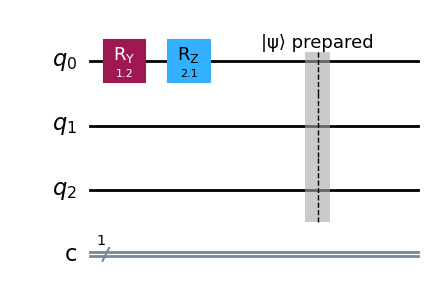

In [3]:
# STEP 1: Arbitrary Qubit Preparation
qc.ry(theta, 0)  
qc.rz(phi, 0)
qc.barrier(label='|ψ⟩ prepared')

# Draw the circuit
qc.draw('mpl')

### Step 2: Create a Bell Pair
- Using qubits 1 and 2, create the Bell state:

$$
|\Phi^{+}\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

- Label clearly:
    - Qubit 0 → Alice’s unknown state
    - Qubit 1 → Alice’s entangled qubit
    - Qubit 2 → Bob’s entangled qubi

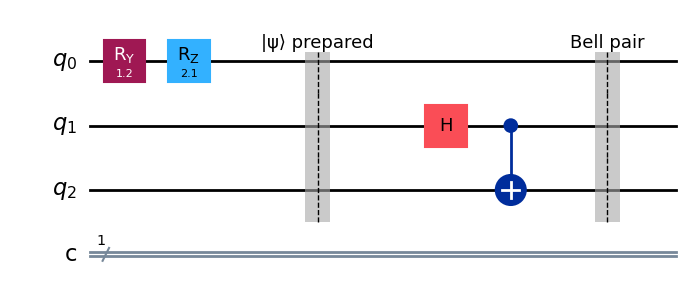

In [4]:
# STEP 2: Create Bell pair
qc.h(1)           # Hadamard on q1 → superposition
qc.cx(1, 2)       # CNOT: q1 (control) → q2 (target)
qc.barrier(label='Bell pair')

# Draw the circuit
qc.draw('mpl')

### Step 3: Perform the Teleportation Circuit
- Apply the Bell-measurement circuit between qubits 0 and 1 as taught in class – First CNOT followed by a Hadamard
- Important Difference From Class:
    - In class, Alice measured qubits 0 and 1 and sent classical bits to Bob.
- In this assignment:
    - Do NOT measure qubits 0 and 1.
    - Do NOT use classical bits or conditional gates.
- Instead, implement the equivalent correction using quantum controlled gates only (Step4)

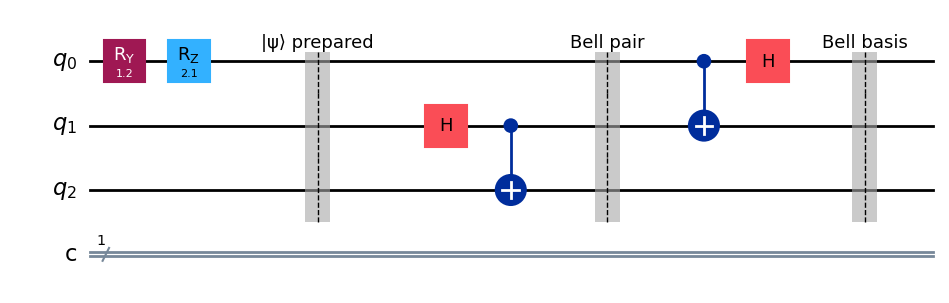

In [5]:
# STEP 3: Perform the Teleportation Circuit
qc.cx(0, 1)       # CNOT: q0 (control) → q1 (target)
qc.h(0)           # Hadamard on q0
qc.barrier(label='Bell basis')

# Draw the circuit
qc.draw('mpl')

### Step 4: Quantum Correction Step
- In this assignment, we do something different. You must:
    - NOT measure qubits 0 and 1
    - NOT use classical bits
    - NOT use conditional gates

- Instead, apply the following controlled gates:
    - qc.cx(1, 2)
    - qc.cz(0, 2)
- These gates perform the teleportation correction coherently in superposition.
- This replaces the classical communication step and keeps the entire circuit unitary.


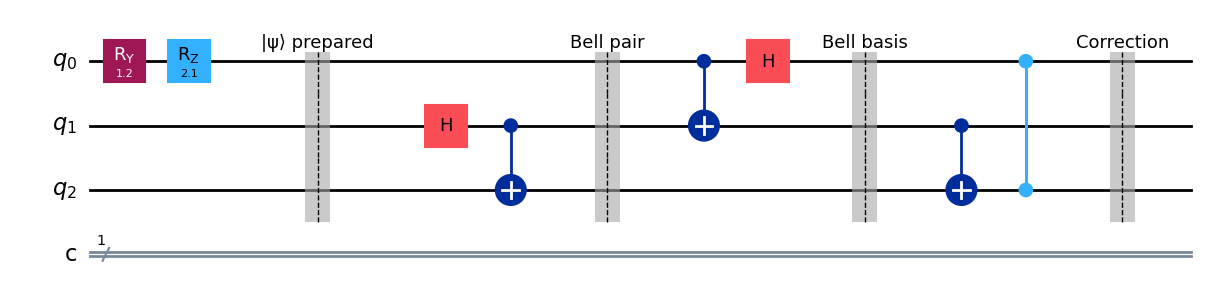

In [6]:
# STEP 4: Quantum correction
qc.cx(1, 2)       # q1 controls q2
qc.cz(0, 2)       # q0 controls q2
qc.barrier(label='Correction')

# Draw the circuit
qc.draw('mpl')

### Step 5: Undo the Unitary U
- Let U be the rotations you applied to qubit 0.
- You must now apply the inverse rotation operation to Bob’s qubit (qubit 2) that is U†

- Important principles:
    - Reverse the order of gates.
    - Use negative angles for rotation gates on qubit 2.
- For example, if you used qc.ry(theta, 0) to rotate the qubit 0 in Step 1, you need to implement qc.ry(− theta, 2) to rotate back (that is undo the operation) on Bob’s qubit. Similarly, do the qc.ry(− phi, 2) step.
- You must determine and apply the remaining inverse operations correctly.

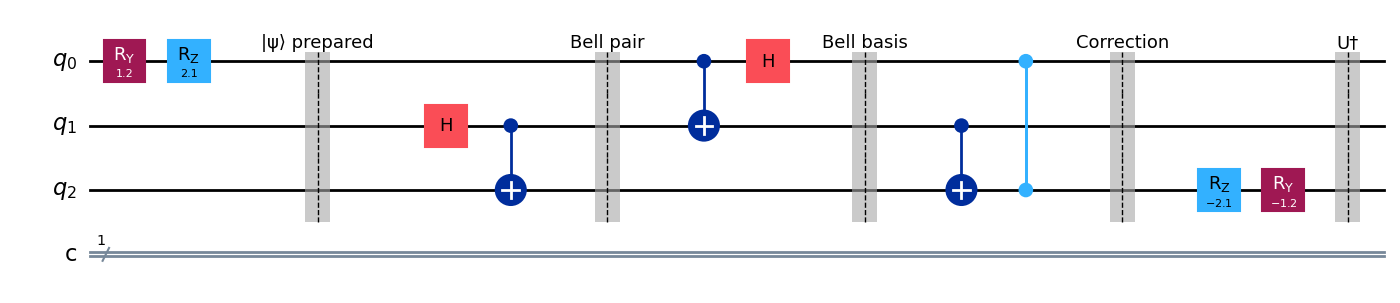

In [7]:
# STEP 5: Undo the unitary U†
qc.rz(-phi, 2)    # Inverse Rz (undo phi rotation first — reversed order)
qc.ry(-theta, 2)  # Inverse Ry (undo theta rotation second)
qc.barrier(label='U†')

# Draw the circuit
qc.draw('mpl')

### Step 6: Measurement and Histogram
1. Measure Bob’s qubit only.
2. Run the circuit with at least 5000 shots.
3. Plot the histogram.
4. Draw the full circuit diagram.

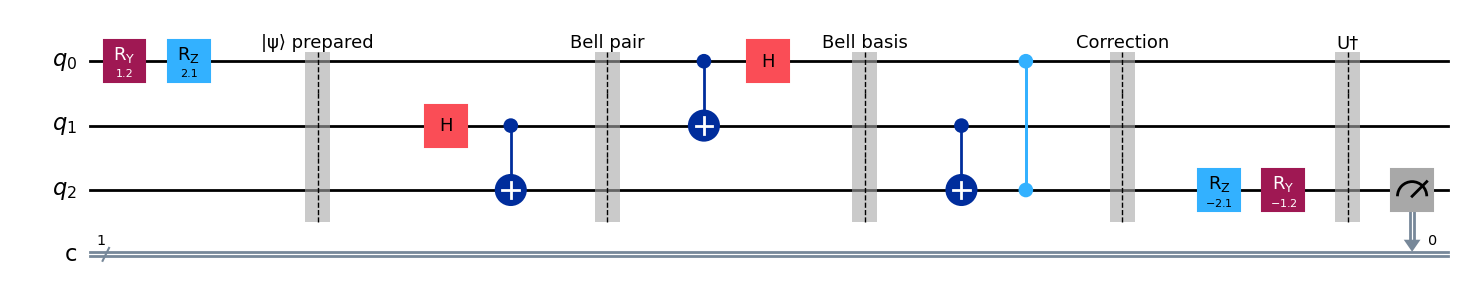

In [8]:
# STEP 6: Measure only Bob's qubit (q2)
qc.measure(2, 0)

# Draw the circuit
qc.draw('mpl')

Measurement results (Bob's qubit): {'0': 5000}
Probability of |0⟩: 100.00%
Probability of |1⟩: 0.00%


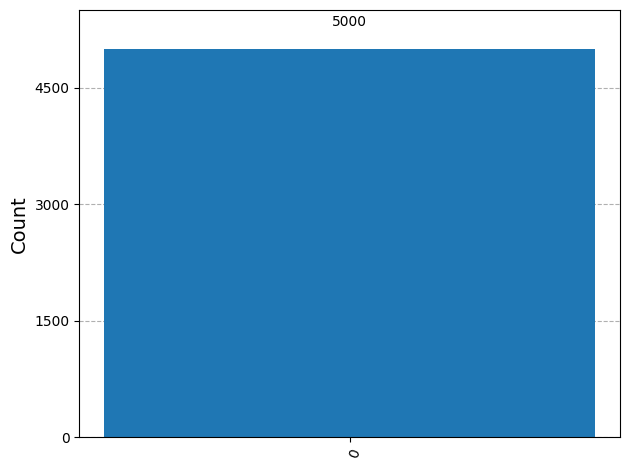

In [9]:
# Running the simulation with 5000+ shots
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=5000)
result = job.result()
counts = result.get_counts()

print("Measurement results (Bob's qubit):", counts)
print(f"Probability of |0⟩: {counts.get('0', 0) / 5000 * 100:.2f}%")
print(f"Probability of |1⟩: {counts.get('1', 0) / 5000 * 100:.2f}%")

# Plot the histogram
plot_histogram(counts)

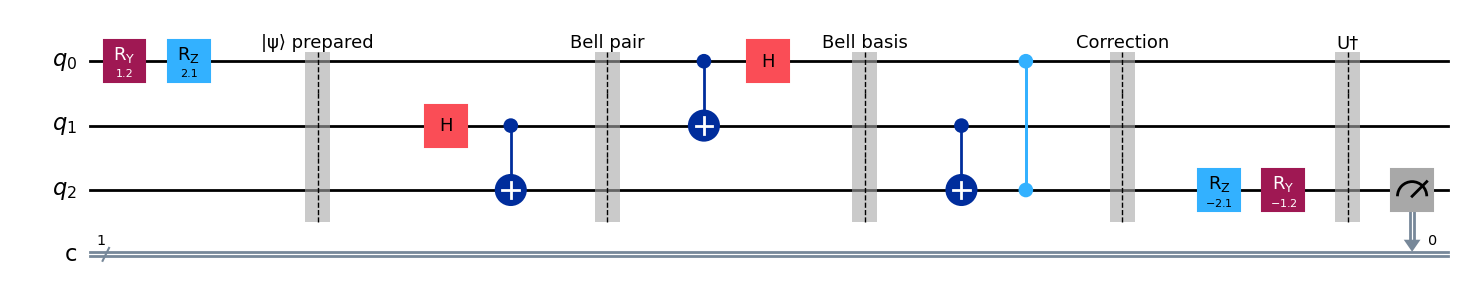

In [10]:
# Full circuit diagram
qc.draw('mpl')

## Part B — Interpretation and Discussion
---
1. What do you observe in the histogram after applying U†? (Is Bob measuring 0 with 100% probability?)
- -> Bob measures |0⟩ with ~100% probability. This is because applying U† after successful teleportation gives U†|ψ⟩ = U†(U|0⟩) = |0⟩.

2. Why does applying U† verify teleportation? (Use: U†U = |0⟩ in your explanation.)
- -> The state prepared on q0 was |ψ⟩ = U|0⟩, where U = Rz(φ)·Ry(θ). After teleportation, Bob's qubit holds exactly |ψ⟩. Applying U† = Ry(−θ)·Rz(−φ) reverses this: U†|ψ⟩ = U†U|0⟩ = I|0⟩ = |0⟩. Measuring |0⟩ with certainty confirms the state was faithfully transferred — if teleportation had failed, Bob would have a wrong/mixed state and U† would not return |0⟩.

3. Why were we able to avoid sending classical bits in this assignment? (Explain how the fully quantum correction differs from the real protocol.)
- -> In the standard protocol, Alice measures qubits 0 and 1 and sends 2 classical bits to Bob who applies conditional X and Z corrections. Here, instead of collapsing those qubits with measurement, we keep them in superposition and apply cx(1,2) and cz(0,2) — coherent controlled gates that perform all four possible corrections simultaneously in superposition. This works only in a simulator/lab where we have direct quantum access to all qubits. In a real-world scenario with Alice and Bob physically separated, classical communication is unavoidable since quantum information cannot be transmitted faster than light; the entanglement alone is not enough without the classical bits to "unlock" the correct state.